In [8]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import scipy.fft
import numpy as np
import os

%matplotlib inline

In [9]:
rate, data = wav.read('test_clean_signal.wav')

In [10]:
#get number of sample points

N = data.shape[0]

#get spacing of the sample

T = 1.0 / rate

#check whether the audio file is stereo or mono. Remove one channel if stereo.
if(len(data.shape)>1):
    y=data[:, 0]
else:
    y=data

#get the frequencies
yf = scipy.fft.fft(y)

#generate the scale for the values
xf = scipy.fft.fftfreq(N, T)

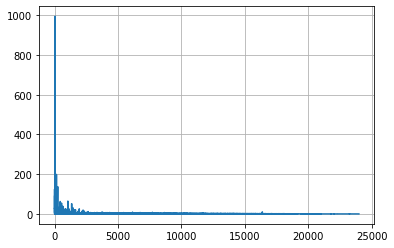

In [11]:
#plot all of the results

plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]))
plt.grid()

#[:N//2] is needed because the second half of the list contains the same values (mirrored)
#It is a product of the FT, but useless in this case

In [12]:
#this function searches for a specific value in a list and outputs the index of the element matching best

def find_freq(list, freq):
    list=np.array(list)
    dif_list=list-freq
    dif_list=np.abs(dif_list)
    index=np.argmin(dif_list)
    return index

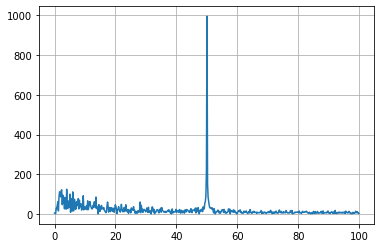

In [13]:
#this slices a specific frequency range out of the data

a=find_freq(xf, 0)
b=find_freq(xf, 100)
xf_slice=xf[a:b]
yf_slice=yf[a:b]

#plot it again
plt.plot(xf_slice[:N//2], 2.0/N * np.abs(yf_slice[:N//2]))
plt.grid()

In [14]:
#this slices the frequency range around 50 Herz out of the data
a=find_freq(xf, 0)
b=find_freq(xf, 100)
xf_slice=xf[a:b]
yf_slice=yf[a:b]

#this searches for the local maxima
maxima_index=np.argmax(yf_slice)

print("Max Frequency is: "+str(xf[maxima_index]))

Max Frequency is: 49.84498963450784
